In [36]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
from hilbert import decode, encode

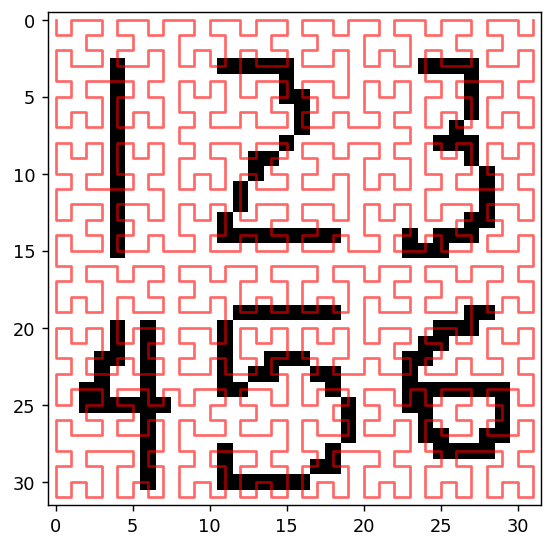

In [114]:
# Sample image to be decomposed
A = image.imread('example-32x32-image.png')[:,:,0]
N = A.shape[0] # Image width/height in pixels
# Add some noise
A += 0.0 * np.random.randn(*A.shape)

# Hilbert curve positions
logN = int(np.log2(N))
locs = decode(np.arange(N**2), 2, logN)

# Visualization
plt.figure(figsize=(5,5),dpi=128)
plt.imshow(A, cmap='binary_r')
plt.plot(locs[:,0], locs[:,1], c='r', alpha=0.6)
plt.show()

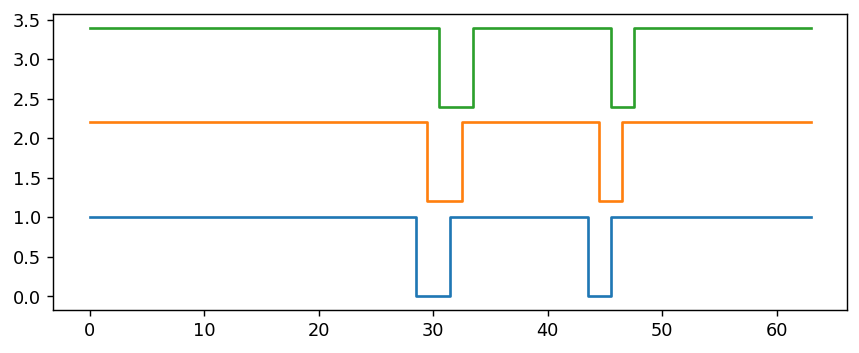

In [128]:
# Creating the sliding window embedding
sw_dim = 3  # Sliding window dimension
sw = np.zeros((N**2 - sw_dim + 1,sw_dim))
# Traversal of the image A along the Hilbert curve
A_hilbert = A[locs[:,0], locs[:,1]]
# Sliding window of the Hilbert curve traversal
for i in range(sw_dim):
    sw[:,sw_dim-i-1] = A_hilbert[i:][:sw.shape[0]]

n_ts_show = 64
plt.figure(figsize=(8,3), dpi=128)
for i in range(sw_dim):
    plt.plot(sw[:n_ts_show,i] + i * (sw.max() + 0.2), ds='steps-mid')

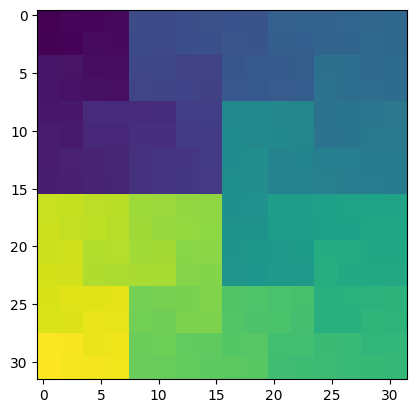

In [ ]:
# Second example, using image based on the hilbert curve
H = np.zeros_like(A)
H[locs[:,0], locs[:,1]] = np.arange(N**2)
plt.imshow(H, interpolation='none')
plt.show()

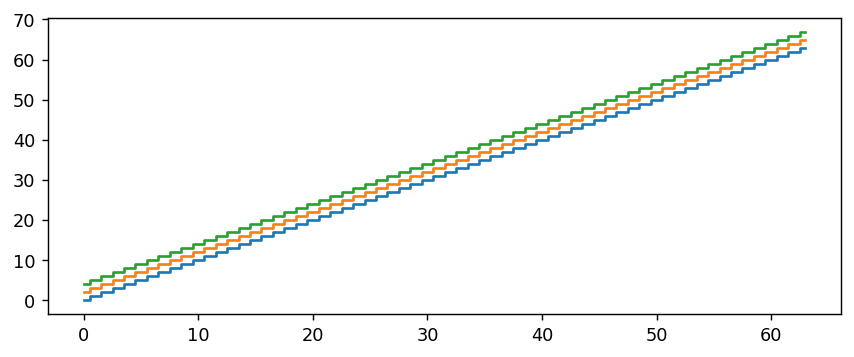

In [123]:
# Creating the sliding window embedding
sw_H = np.zeros((N**2 - sw_dim + 1,sw_dim))
# Traversal of the image A along the Hilbert curve
H_hilbert = H[locs[:,0], locs[:,1]]
# Sliding window of the Hilbert curve traversal
for i in range(sw_dim):
    sw_H[:,i] = H_hilbert[i:][:sw_H.shape[0]]

n_ts_show = 64
plt.figure(figsize=(8,3), dpi=128)
for i in range(sw_dim):
    plt.plot(sw_H[:n_ts_show,i] + i * sw.max(), ds='steps-mid')